In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
train_info = pd.DataFrame([train.dtypes, train.isna().sum(), train.nunique()], index = ['dtypes', 'nnull', 'nuniq'], columns = train.columns)
train_info

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
dtypes,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
nnull,0,0,0,0,0,0,0,0,0,0,0,0,0
nuniq,2190,365,236,219,198,199,218,49,78,120,35,223,2


In [5]:
train_copy = train.drop(columns = ['id', 'day'])
train_desc = train_copy.describe()
train_desc

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


<Axes: >

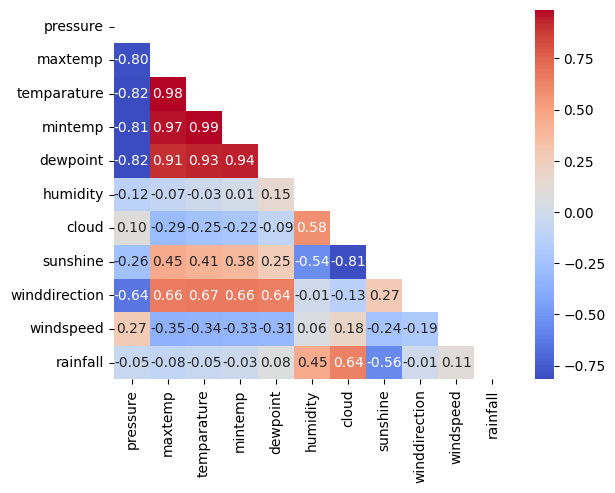

In [6]:
mask = np.zeros_like(train_copy.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_copy.corr(), cmap = 'coolwarm', annot = True, mask = mask, fmt = '.2f')

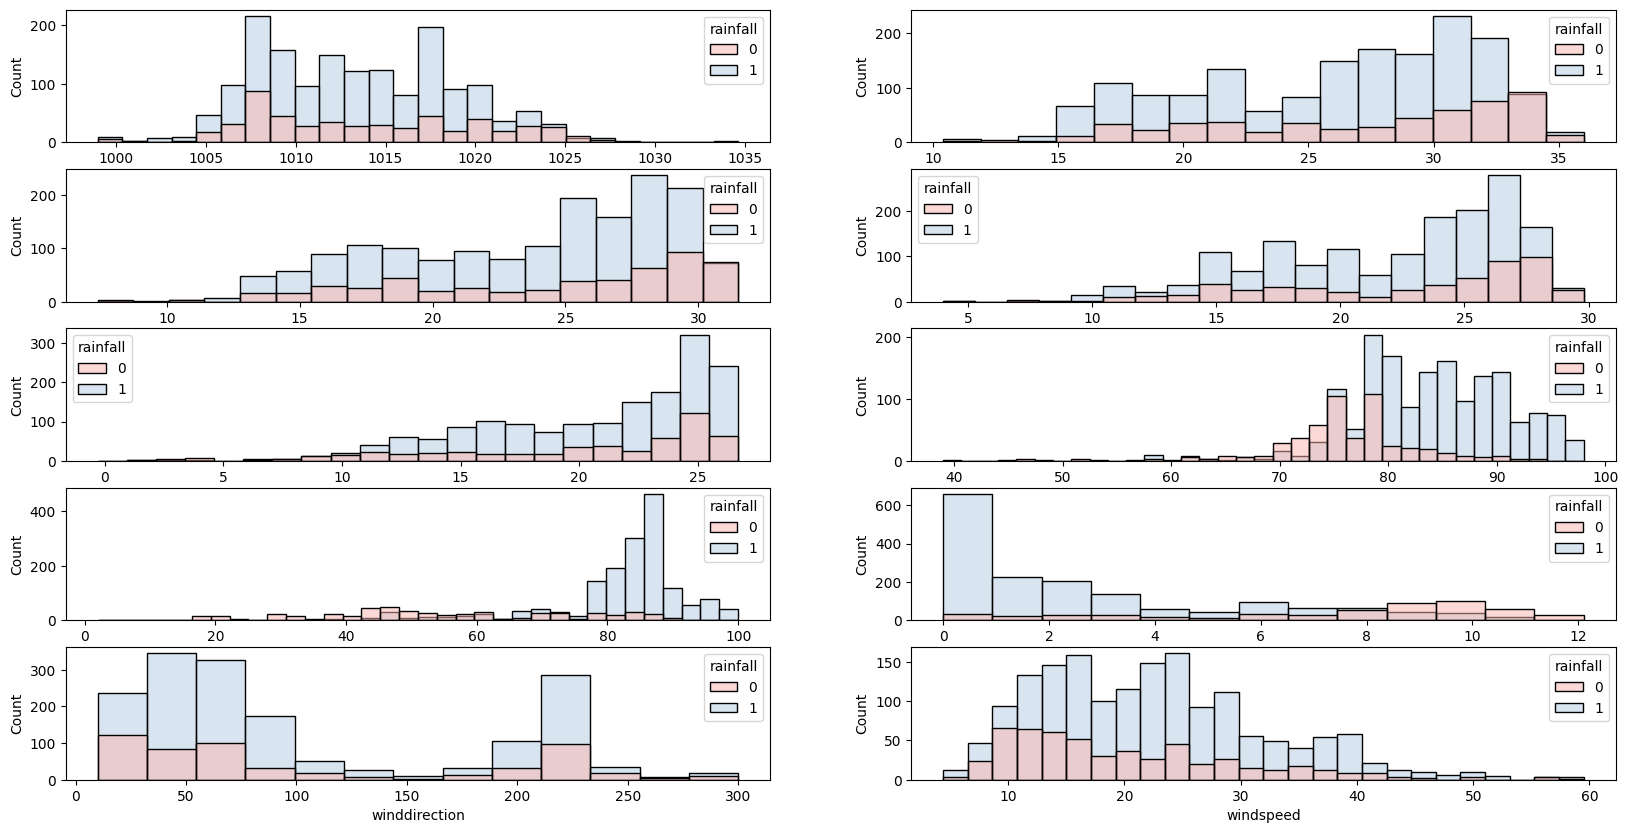

In [7]:
fig, axes = plt.subplots(5,2, figsize = (20, 10))

for i, ax in enumerate(axes.flatten()):
    col = train_copy.columns[i]
    sns.histplot(train_copy, x = col, ax = ax, hue = 'rainfall',  palette = 'Pastel1')

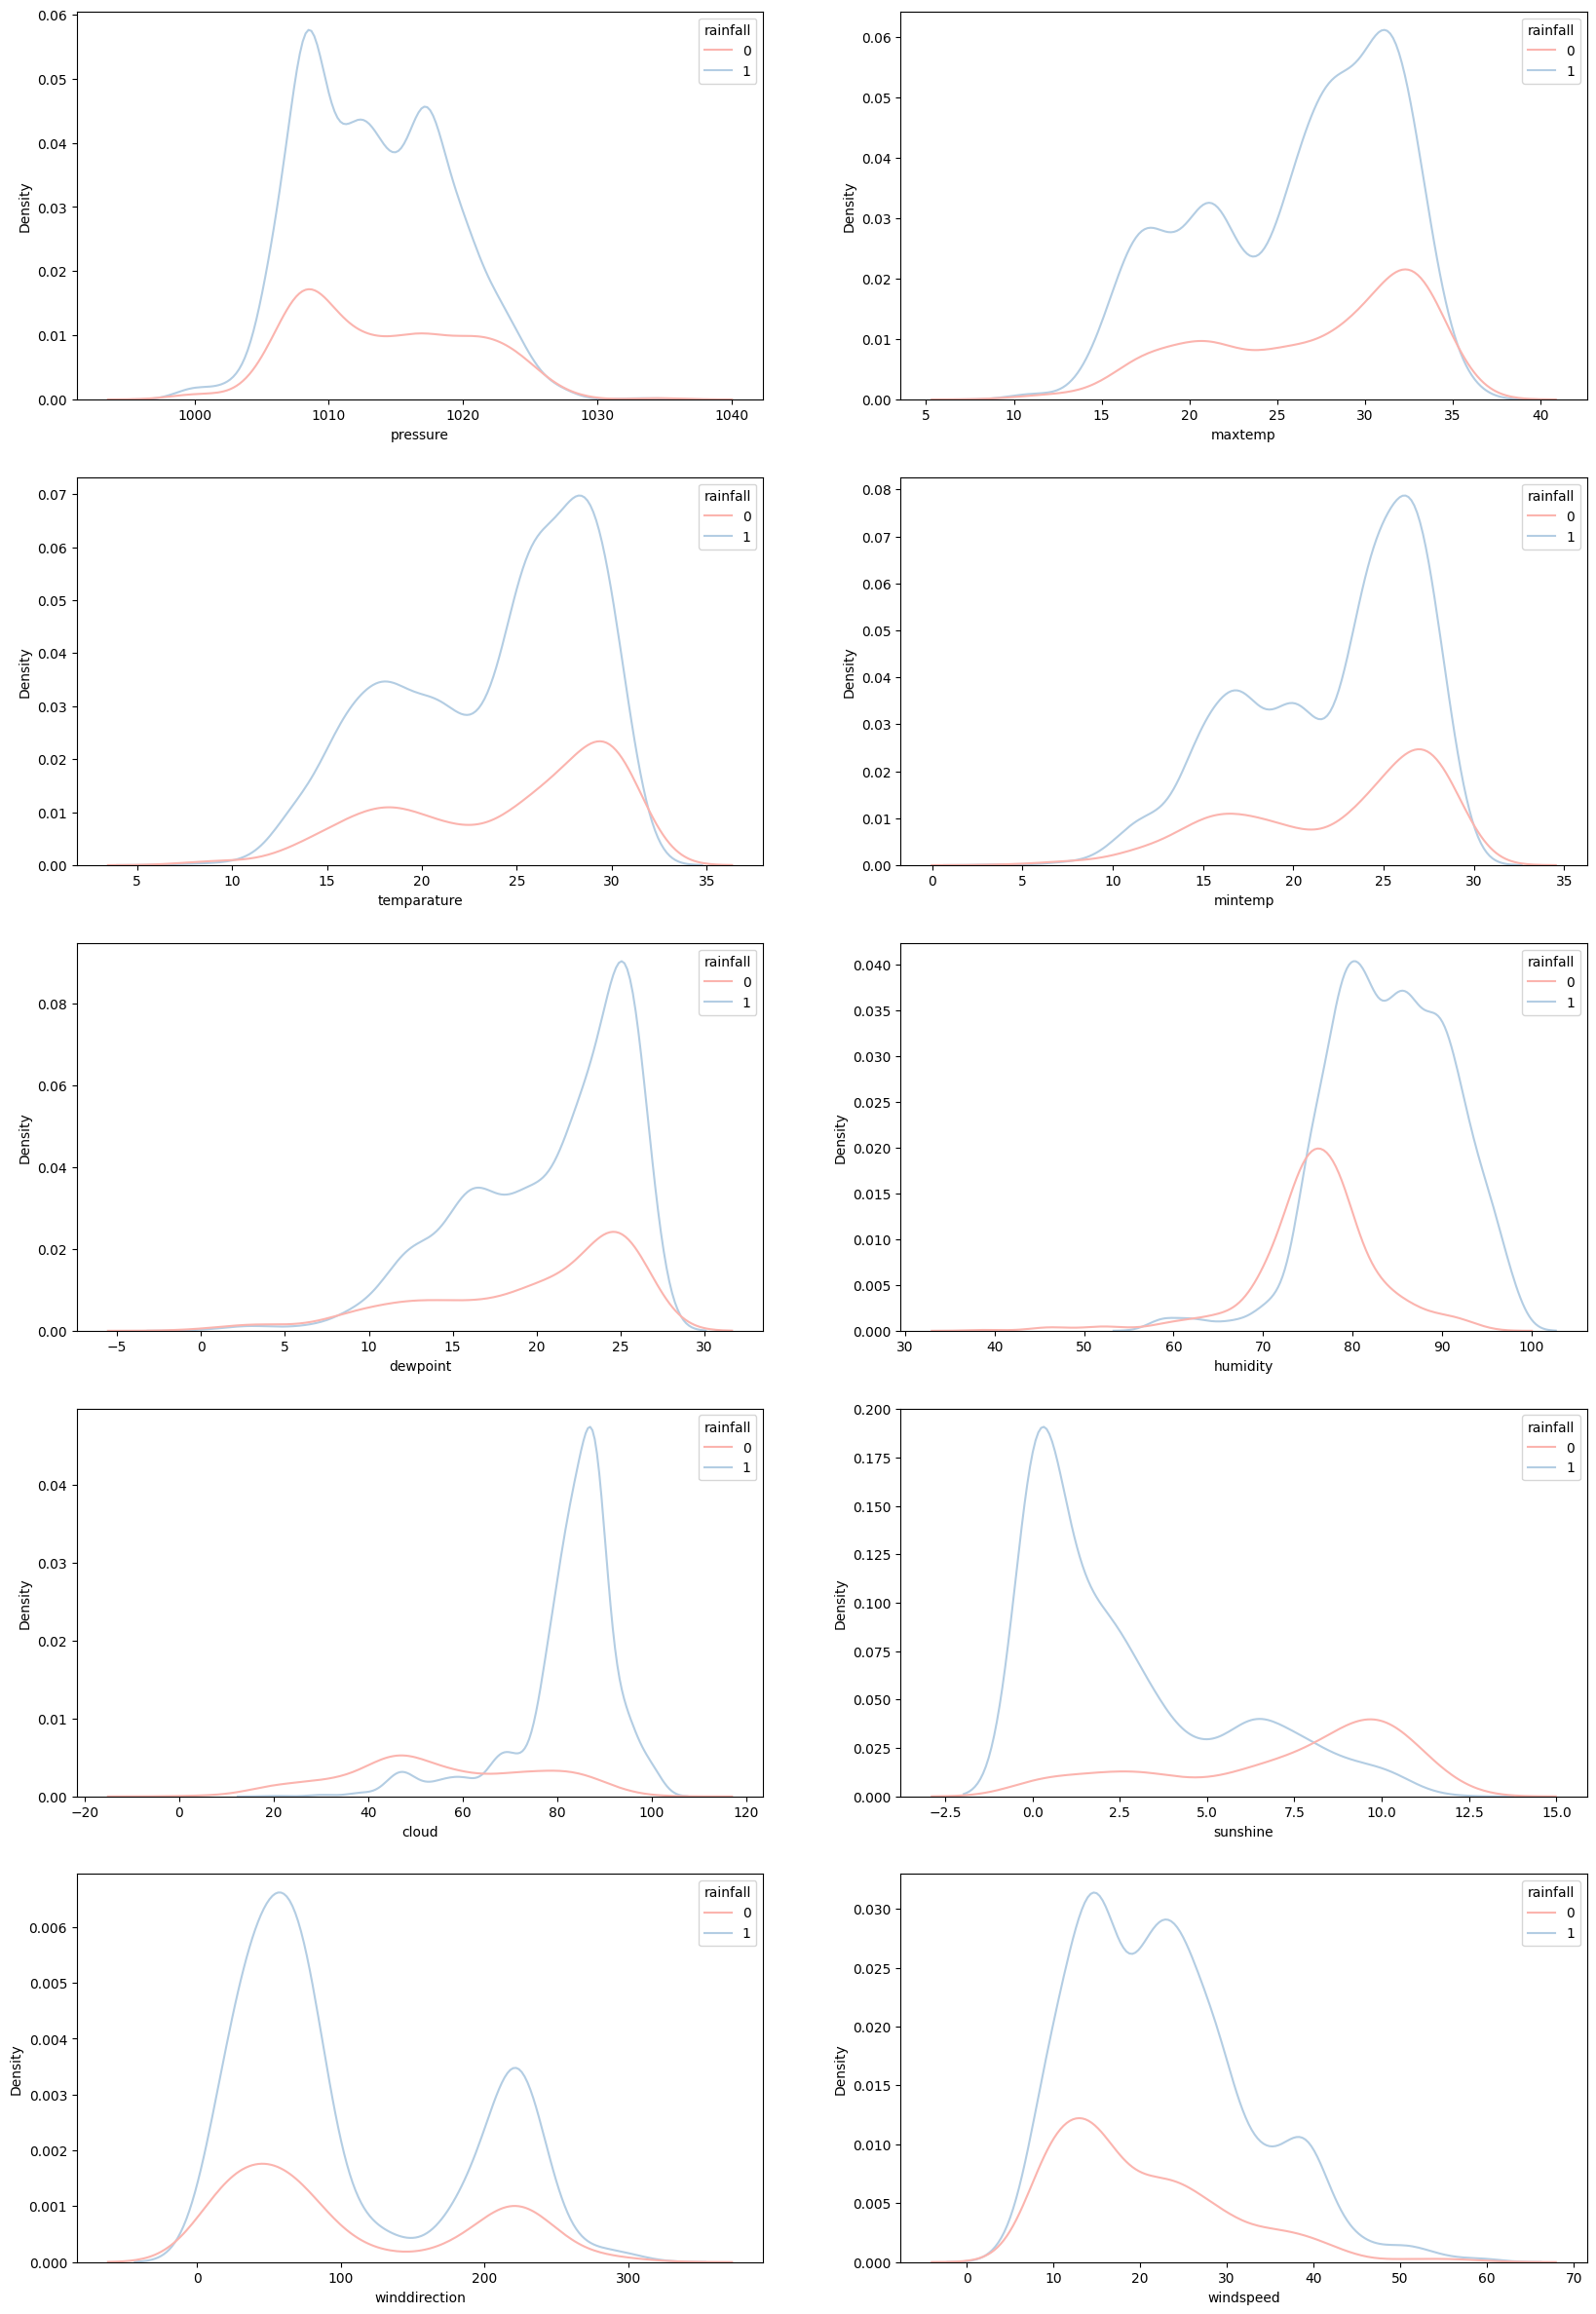

In [8]:
fig, axes = plt.subplots(5,2, figsize = (20, 30))

for i, ax in enumerate(axes.flatten()):
    col = train_copy.columns[i]
    sns.kdeplot(train_copy, x = col, ax = ax, hue = 'rainfall',  palette = 'Pastel1')


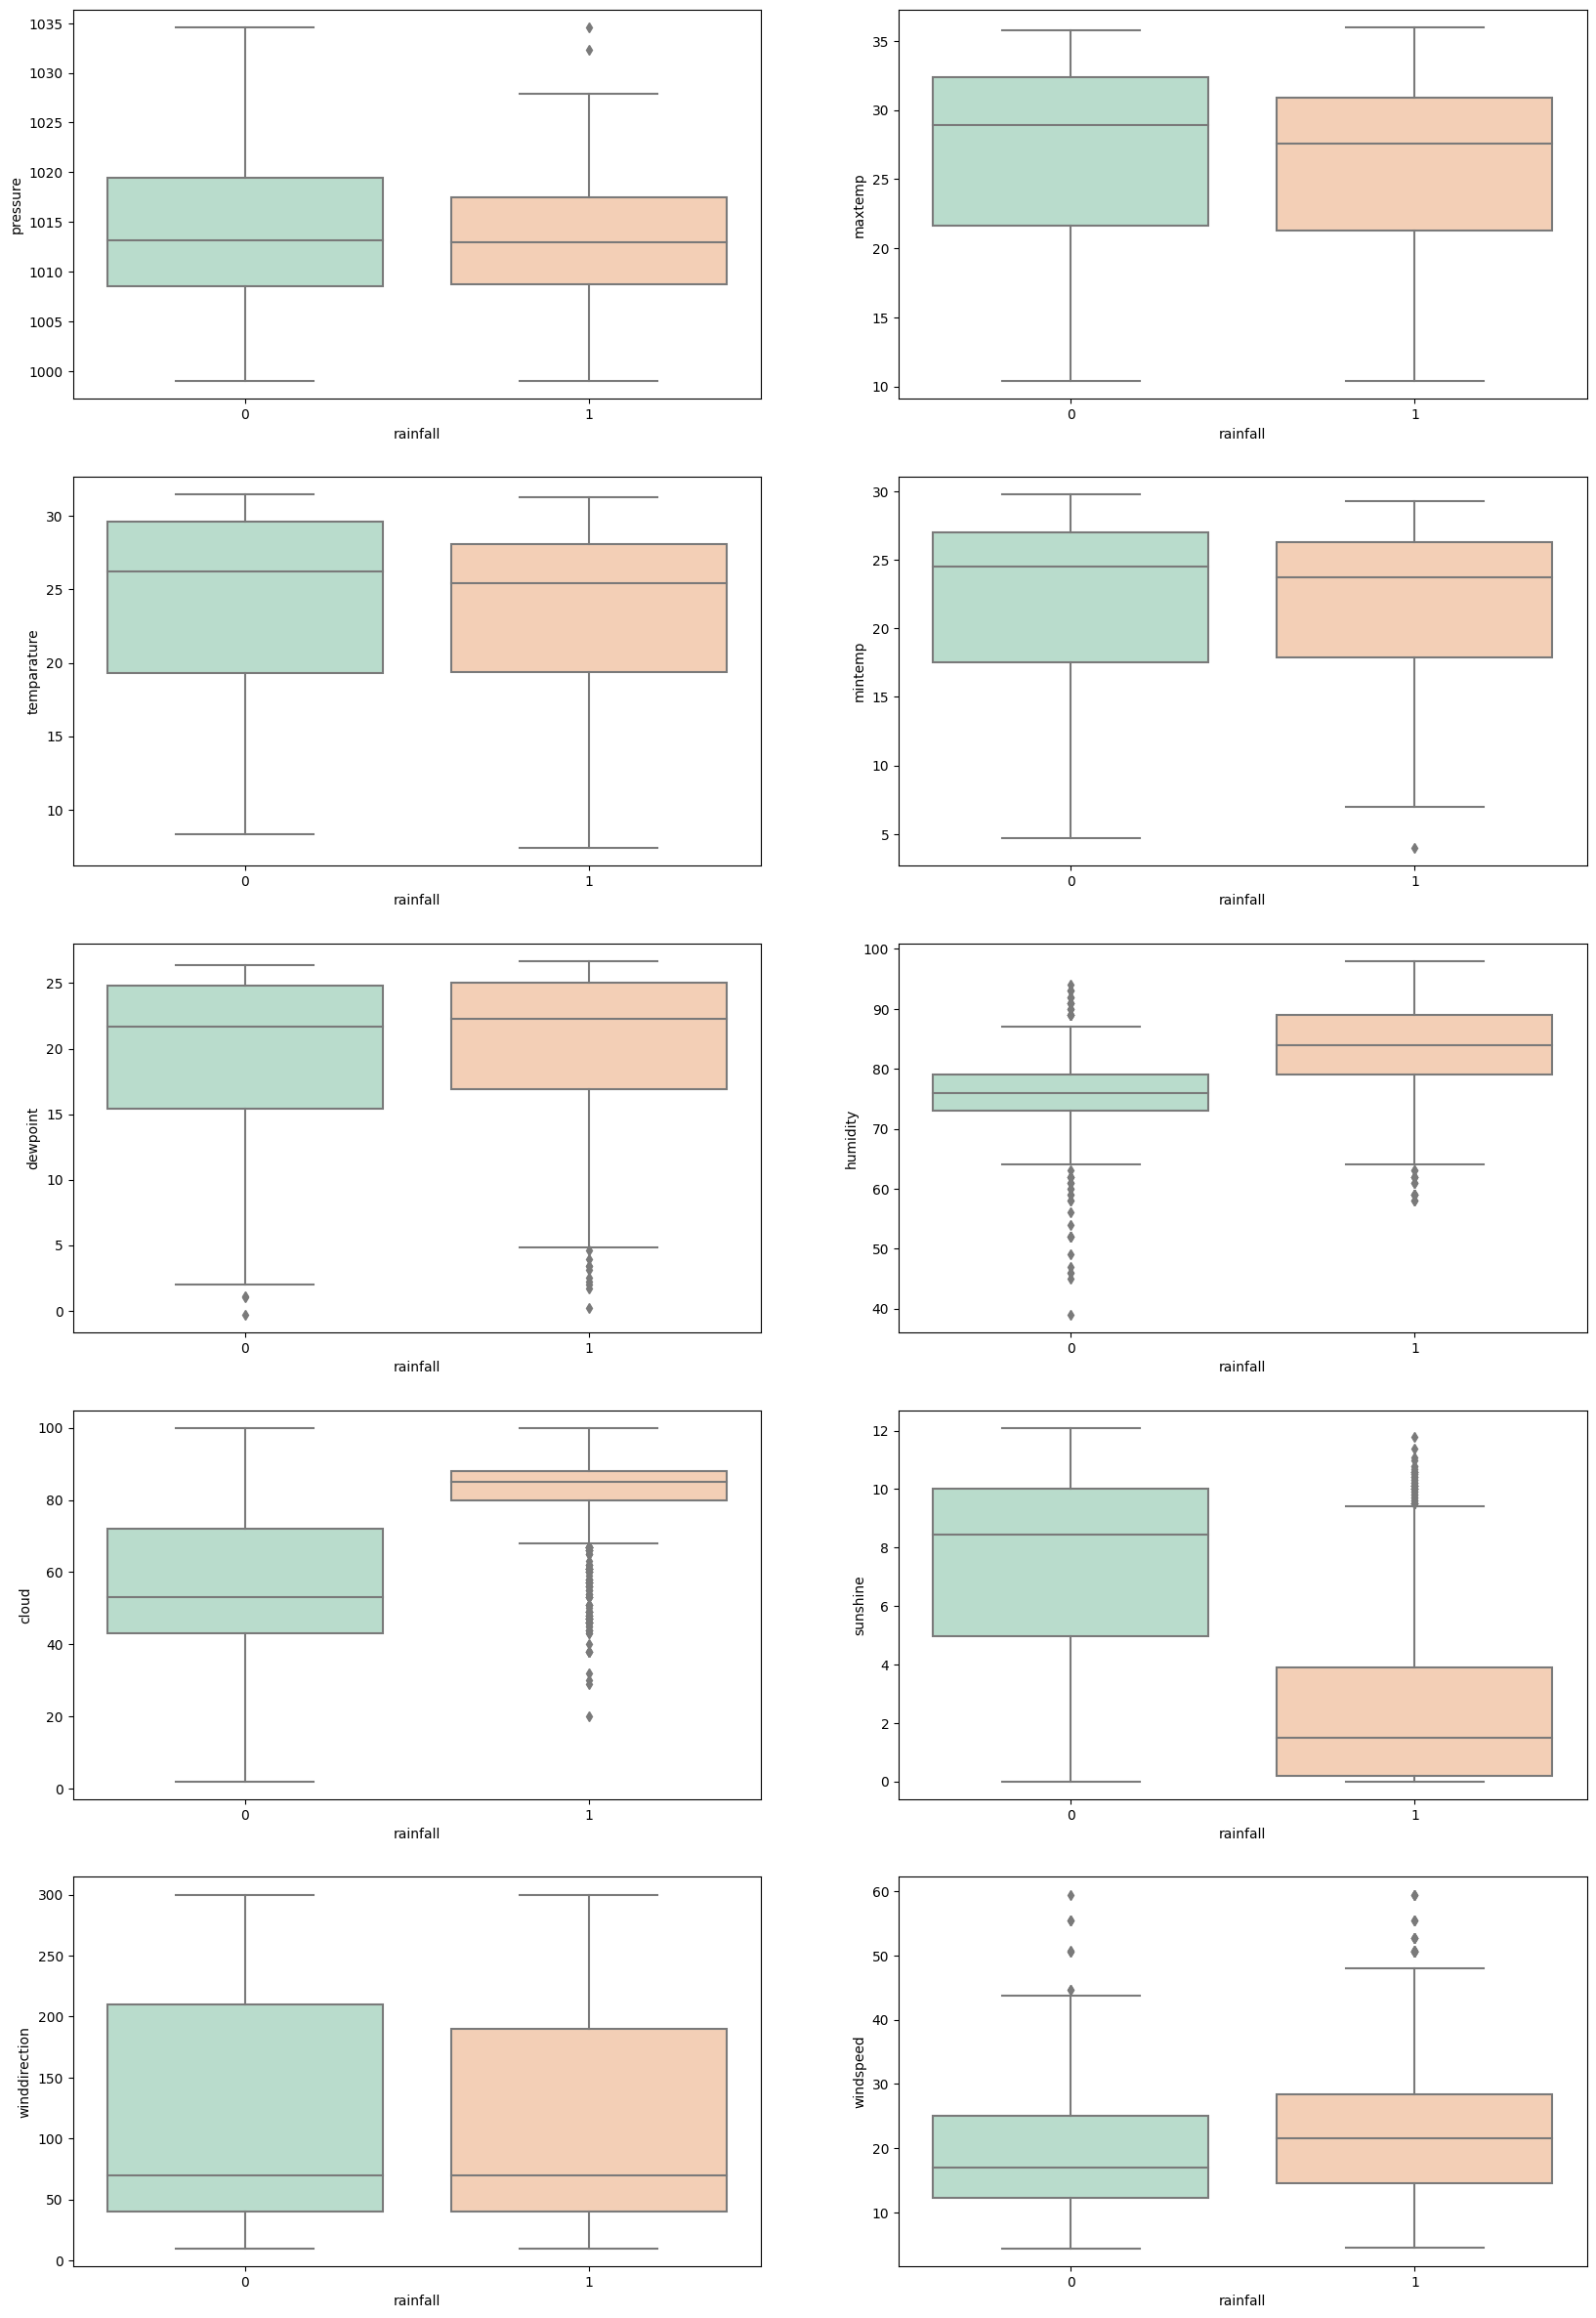

In [9]:
fig, axes = plt.subplots(5,2, figsize = (20, 30))

for i, ax in enumerate(axes.flatten()):
    col = train_copy.columns[i]
    sns.boxplot(train_copy, y = col, ax = ax, x = 'rainfall', palette = 'Pastel2')

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
import umap.umap_ as umap

2025-07-13 06:38:42.893599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752388723.147380      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752388723.218251      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
x_train = train_copy.drop(columns = ['rainfall'])
y_train = train_copy['rainfall']
um = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_umap = um.fit_transform(x_train_scaled)

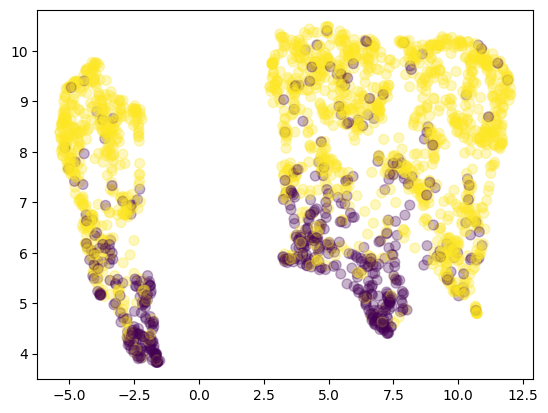

In [13]:
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.3)

In [14]:
from sklearn.decomposition import PCA

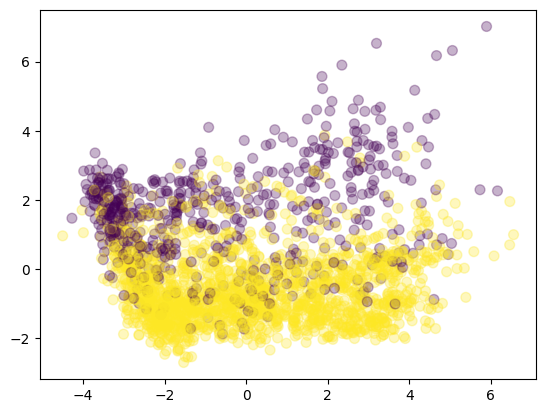

In [15]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_train_scaled)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.3)

In [16]:
from xgboost import XGBClassifier

In [17]:
xgbc_umap = XGBClassifier()
xgbc_umap.fit(x_umap, y_train)
y_pred_umap = xgbc_umap.predict(x_umap)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [19]:
accuracy_umap = accuracy_score(y_train, y_pred_umap)
y_proba_umap = xgbc_umap.predict_proba(x_umap)
roc_auc_score_umap = roc_auc_score(y_train, y_proba_umap[:,1])

print('umap 결과')
print(f'정확도:{accuracy_umap}')
print(f'roc_auc_score:{roc_auc_score_umap}')
display(confusion_matrix(y_train, y_pred_umap))

umap 결과
정확도:0.9269406392694064
roc_auc_score:0.9785415263748598


array([[ 442,   98],
       [  62, 1588]])

In [20]:
xgbc_pca = XGBClassifier()
xgbc_pca.fit(x_pca, y_train)
y_pred_pca = xgbc_pca.predict(x_pca)

In [21]:
accuracy_pca = accuracy_score(y_train, y_pred_pca)
y_proba_pca = xgbc_pca.predict_proba(x_pca)
roc_auc_score_pca = roc_auc_score(y_train, y_proba_pca[:,1])

print('pca 결과')
print(f'정확도:{accuracy_pca}')
print(f'roc_auc_score:{roc_auc_score_pca}')
display(confusion_matrix(y_train, y_pred_pca))

pca 결과
정확도:0.9337899543378996
roc_auc_score:0.9814208754208755


array([[ 425,  115],
       [  30, 1620]])

In [22]:
x_test = test.drop(columns = ['id', 'day'])
x_test_info = pd.DataFrame([x_test.dtypes, x_test.isna().sum(), x_test.nunique()], index = ['dtypes', 'nnull', 'nuniq'], columns = x_test.columns)
x_test_info

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nnull,0,0,0,0,0,0,0,0,1,0
nuniq,185,182,175,171,172,42,69,110,29,205


In [23]:
x_test = x_test.fillna(x_test['winddirection'].mean())
x_test.isna().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [24]:
x_test

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...,...,...
725,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5


In [25]:
submission = pd.read_csv('/kaggle/input/playground-series-s5e3/sample_submission.csv')
submission

,id,rainfall
0,2190,0
1,2191,0
2,2192,0
3,2193,0
4,2194,0
...,...,...
725,2915,0
726,2916,0
727,2917,0
728,2918,0


In [26]:
x_test = x_test.dropna()
x_test_scaled = scaler.transform(x_test)
x_test_umap = um.transform(x_test_scaled)

submission['rainfall'] = xgbc_umap.predict(x_test_umap)
submission

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [27]:
submission.to_csv('submission.csv')